In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import plot_info # Does this set the plot style ? Yes it does

claims_df = pd.read_csv('preprocessed_data/claims_db_truncated_for_llm.csv')
major_claims_df = claims_df[claims_df['assertion_type'] == 'major_claim']


aut_pos = "FH"

aut_pos_data = {
        "fn": 'preprocessed_data/LH_inner.csv',
        "all_binary_variables": {
            "Historical lab": {
                "labels": ['Non-traditional\nLaboratories', 'Traditional-Historical\nLaboratories'],
                "title": "Assessment of Scientific Claims by Laboratory Tradition",
                "fig_name_prefix" : "fig5B_"
                },
            "Continuity": {
                "labels": ['No-continuity \n in the field', 'Continuity \n in the field'],
                "title": "Assessment of Scientific Claims by Continuity",
                "fig_name_prefix" : "fig5B_"
                },
            "Sex": {
                "labels": ["Female", "Male"], # check if this is correct -> Yes, this is correct
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig5B_",

            }
            }}


df = pd.read_csv(aut_pos_data['fn'])
df = df.sort_values(by="Challenged_prop", ascending=False).reset_index(drop=True)

In [13]:
print(len(df))
df = df[(df["Major claims"] >= 6) & (df["Articles"] >= 2)]
print(len(df))

156
49


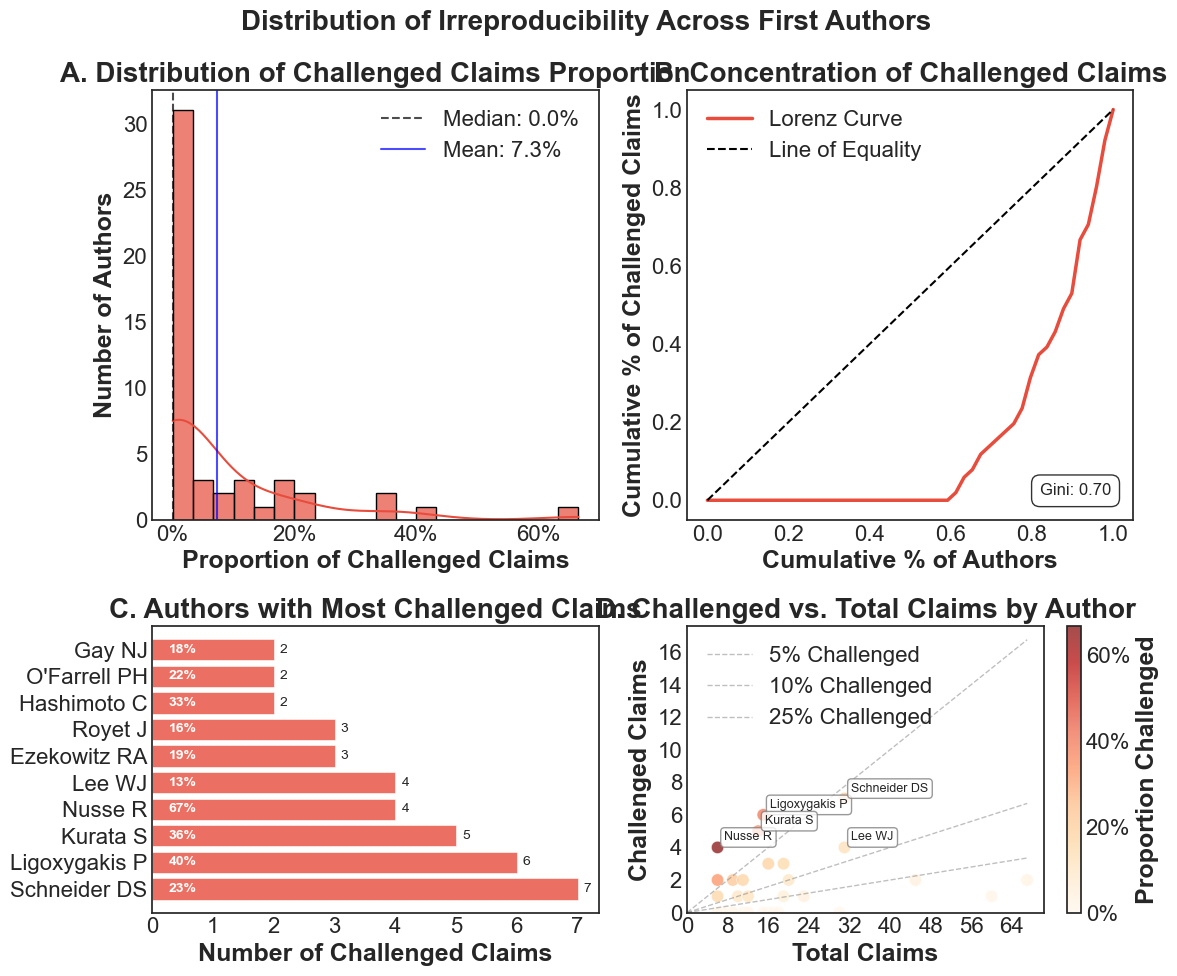

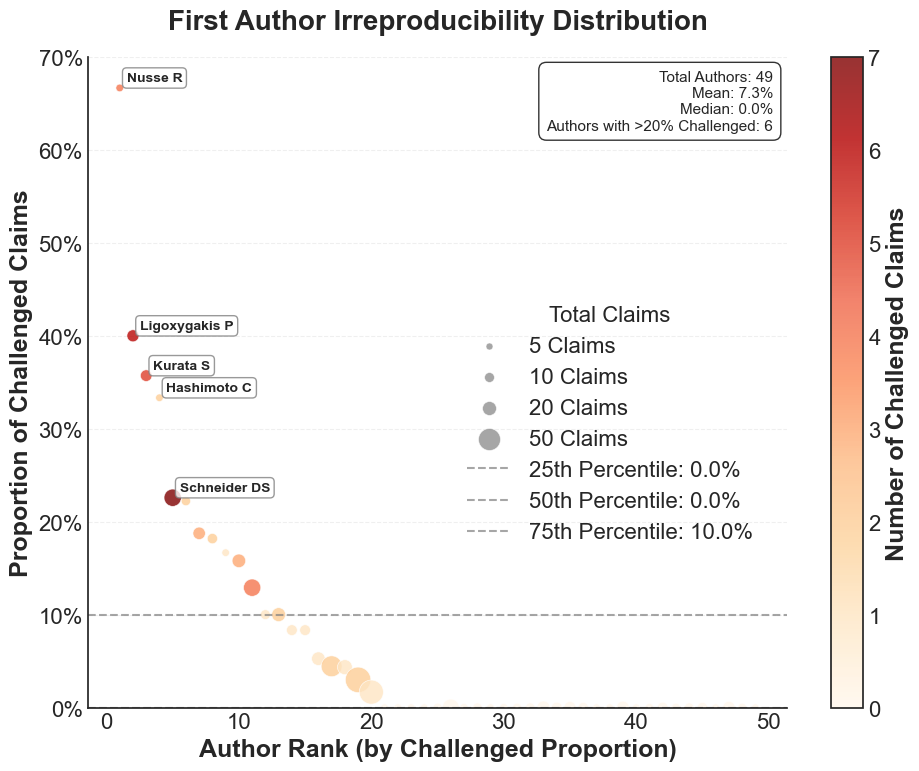

In [17]:

fig, axes = plot_info.plot_author_irreproducibility_distribution(
    df=df,
    min_claims=3,
    title="Distribution of Irreproducibility Across First Authors"
)
plt.savefig('figures/fig5A-V1.png', dpi=300, bbox_inches='tight')
fig, ax = plot_info.plot_author_irreproducibility_focused(
    df=df,
    min_claims=3,
    title="First Author Irreproducibility Distribution"
)
plt.savefig('figures/fig5A-V2.png', dpi=300, bbox_inches='tight')

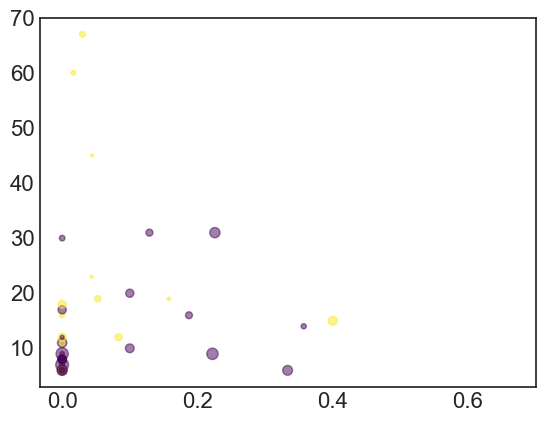

In [18]:
plt.scatter(df["Challenged_prop"], df["Major claims"], s=df["Unchallenged_prop"]*100, c=df["Historical lab"]+10*4, cmap='viridis', alpha=0.5)

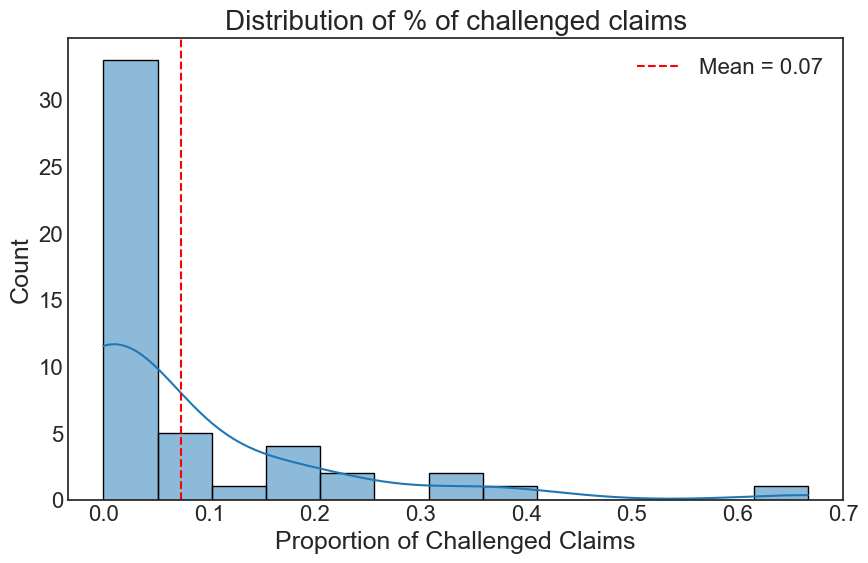

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged_prop,Verified_prop,Partially Verified_prop,Mixed_prop,Challenged_prop,Challenged_prop,Articles,Major claims
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.163265,9.020408,1.183673,0.163265,1.040816,0.237232,0.591910,0.084940,0.012819,0.073098,0.073098,5.571429,14.571429
std,3.368648,10.190866,1.394535,0.514253,1.695081,0.217985,0.250111,0.096773,0.043569,0.133925,0.133925,5.024938,13.060755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
25%,1.000000,4.000000,0.000000,0.000000,0.000000,0.043478,0.451613,0.000000,0.000000,0.000000,0.000000,3.000000,6.000000
50%,2.000000,6.000000,1.000000,0.000000,0.000000,0.181818,0.631579,0.066667,0.000000,0.000000,0.000000,4.000000,10.000000
75%,5.000000,10.000000,2.000000,0.000000,2.000000,0.375000,0.777778,0.142857,0.000000,0.100000,0.100000,6.000000,16.000000
max,17.000000,47.000000,6.000000,2.000000,7.000000,0.857143,1.000000,0.375000,0.181818,0.666667,0.666667,28.000000,67.000000


In [19]:
# Let's examine the distribution of this score
plt.figure(figsize=(10, 6))
sns.histplot(df['Challenged_prop'], kde=True)
plt.title('Distribution of % of challenged claims')
plt.xlabel('Proportion of Challenged Claims')
plt.axvline(df['Challenged_prop'].mean(), color='red', linestyle='--', 
            label=f'Mean = {df["Challenged_prop"].mean():.2f}')
plt.legend()
plt.show()

# Basic descriptive statistics
descriptive_stats = df[assessment_columns + [col + '_prop' for col in assessment_columns] + 
                     ['Challenged_prop', 'Articles', 'Major claims']].describe()
print("Descriptive Statistics:")
descriptive_stats


Summary of Historical lab:
                Major claims  Articles  Verified_prop  Challenged_prop  \
Historical lab                                                           
False                    322       123       0.478261         0.099379   
True                     392       150       0.734694         0.048469   

                Unchallenged_prop  
Historical lab                     
False                    0.319876  
True                     0.132653  
Index([False, True], dtype='bool', name='Historical lab')
Summary of Continuity:
            Major claims  Articles  Verified_prop  Challenged_prop  \
Continuity                                                           
False                186        72       0.516129         0.086022   
True                 528       201       0.655303         0.066288   

            Unchallenged_prop  
Continuity                     
False                0.317204  
True                 0.181818  
Index([False, True], dtype='bool', name='C

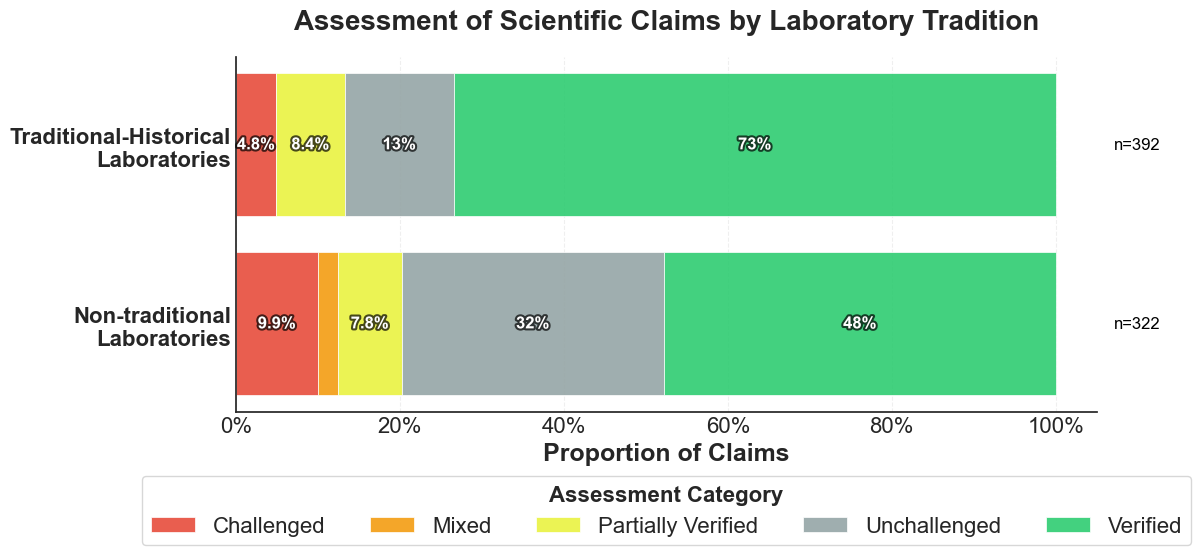

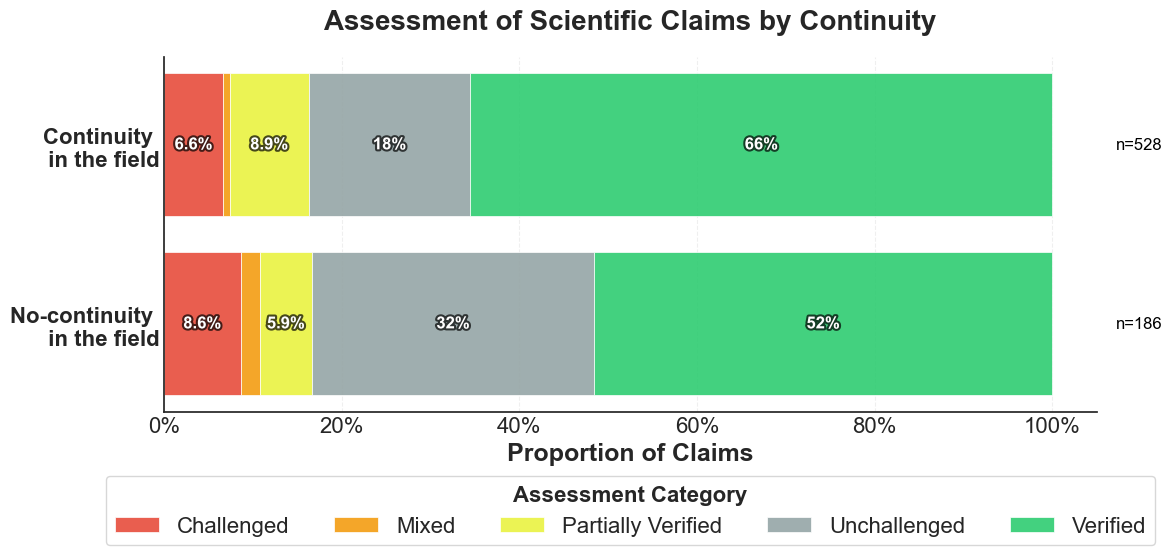

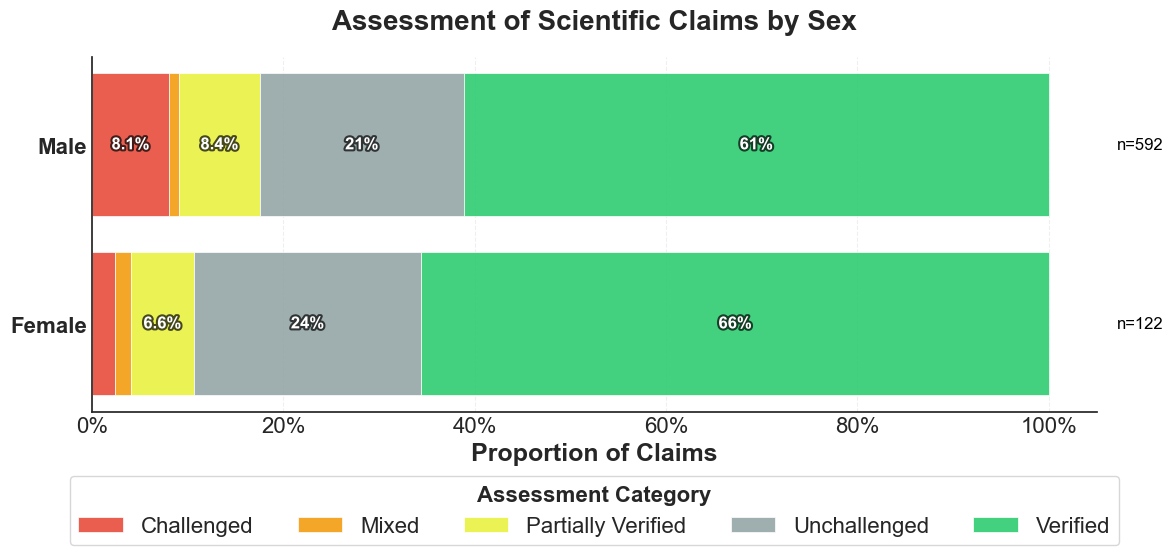

In [20]:
to_plot = df.copy()
to_plot
all_binary_variables = aut_pos_data["all_binary_variables"]
for variable in all_binary_variables.keys():
    # Group by historical lab status
    var_grouped = df.groupby(variable).agg({
        **{col: 'sum' for col in assessment_columns},
        'Major claims': 'sum',
        'Articles': 'sum',
    })

    # Calculate proportions
    for col in assessment_columns:
        var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

    print(f"Summary of {variable}:")
    print(var_grouped[['Major claims', 'Articles', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])
    print(var_grouped.index)
    if variable == "PhD Post-doc":
        var_grouped = var_grouped.loc[["PhD", "Post-doc"]]
    
    
    fig, ax = plot_info.create_horizontal_bar_chart(var_grouped, show_p_value=False, labels=all_binary_variables[variable]["labels"], title=all_binary_variables[variable]["title"])
    plt.savefig(f"figures/{all_binary_variables[variable]['fig_name_prefix']}binary_{variable}.png", dpi=300, bbox_inches='tight')


/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_6996/4008182126.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = to_plot.groupby('Article_bin')['Challenged_prop'].median()


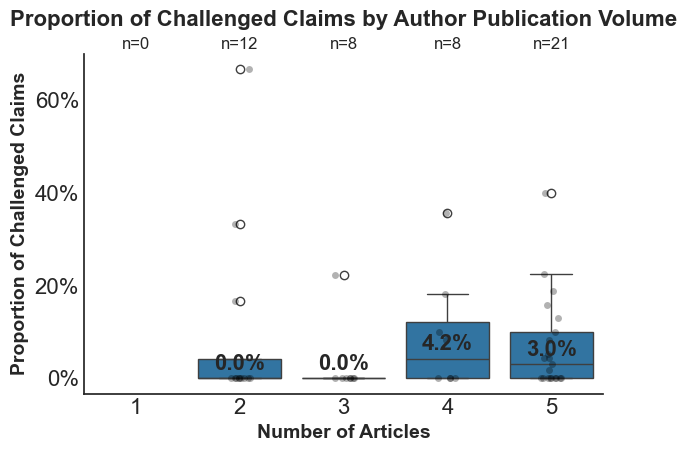

In [21]:

# Create article count bins
article_bins = [.5, 1.5, 2.5, 3.5, 4.5,  float('inf')]
bin_labels =     ['1', '2', '3', '4', '5']
to_plot['Article_bin'] = pd.cut(to_plot['Articles'], bins=article_bins, labels=bin_labels)

# Create the boxplot
ax = sns.boxplot(x='Article_bin', y='Challenged_prop', data=to_plot)

# Add individual data points
sns.stripplot(x='Article_bin', y='Challenged_prop', data=to_plot, 
              color='black', alpha=0.3, jitter=True)

# Add count annotations below each category
for i, cat in enumerate(bin_labels):
    count = len(to_plot[to_plot['Article_bin'] == cat])
    ax.text(i, 1.05, f"n={count}", ha='center', va='top', fontsize=12,
            transform=ax.get_xaxis_transform())

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plot_info.PercentFormatter(1.0))

# Add labels and title
plt.xlabel('Number of Articles', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Challenged Claims', fontsize=14, fontweight='bold')
plt.title('Proportion of Challenged Claims by Author Publication Volume', 
          fontsize=16, fontweight='bold', pad=20)

# Add median values on top of each box
medians = to_plot.groupby('Article_bin')['Challenged_prop'].median()
for i, m in enumerate(medians):
    ax.text(i, m + 0.01, f"{m:.1%}", ha='center', va='bottom', fontweight='bold')

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.savefig('figures/fig4B-nb_article.png', dpi=300, bbox_inches='tight')

### Continuous Variables

/Users/chadi/Research/drosophila-reproducibility/plot_info.py:1357: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


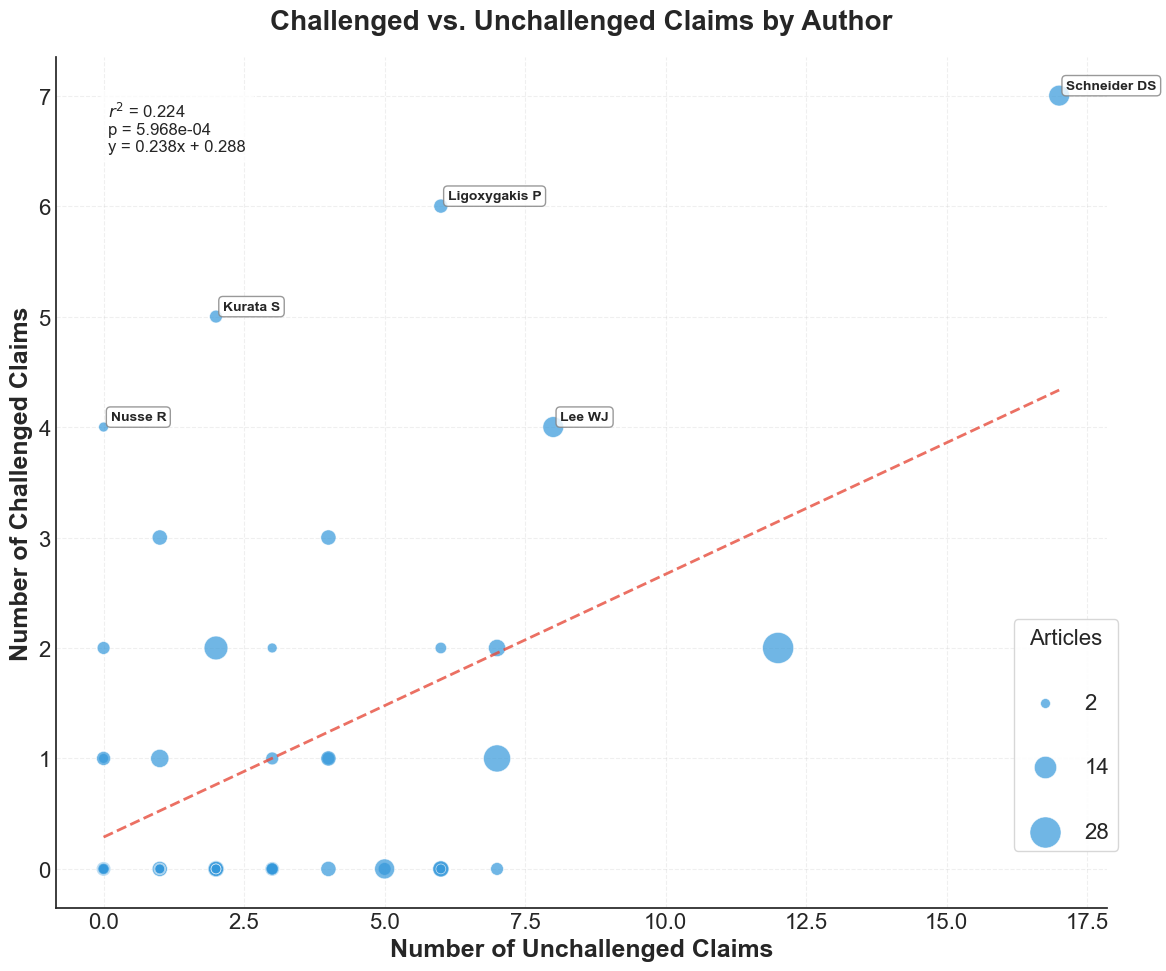

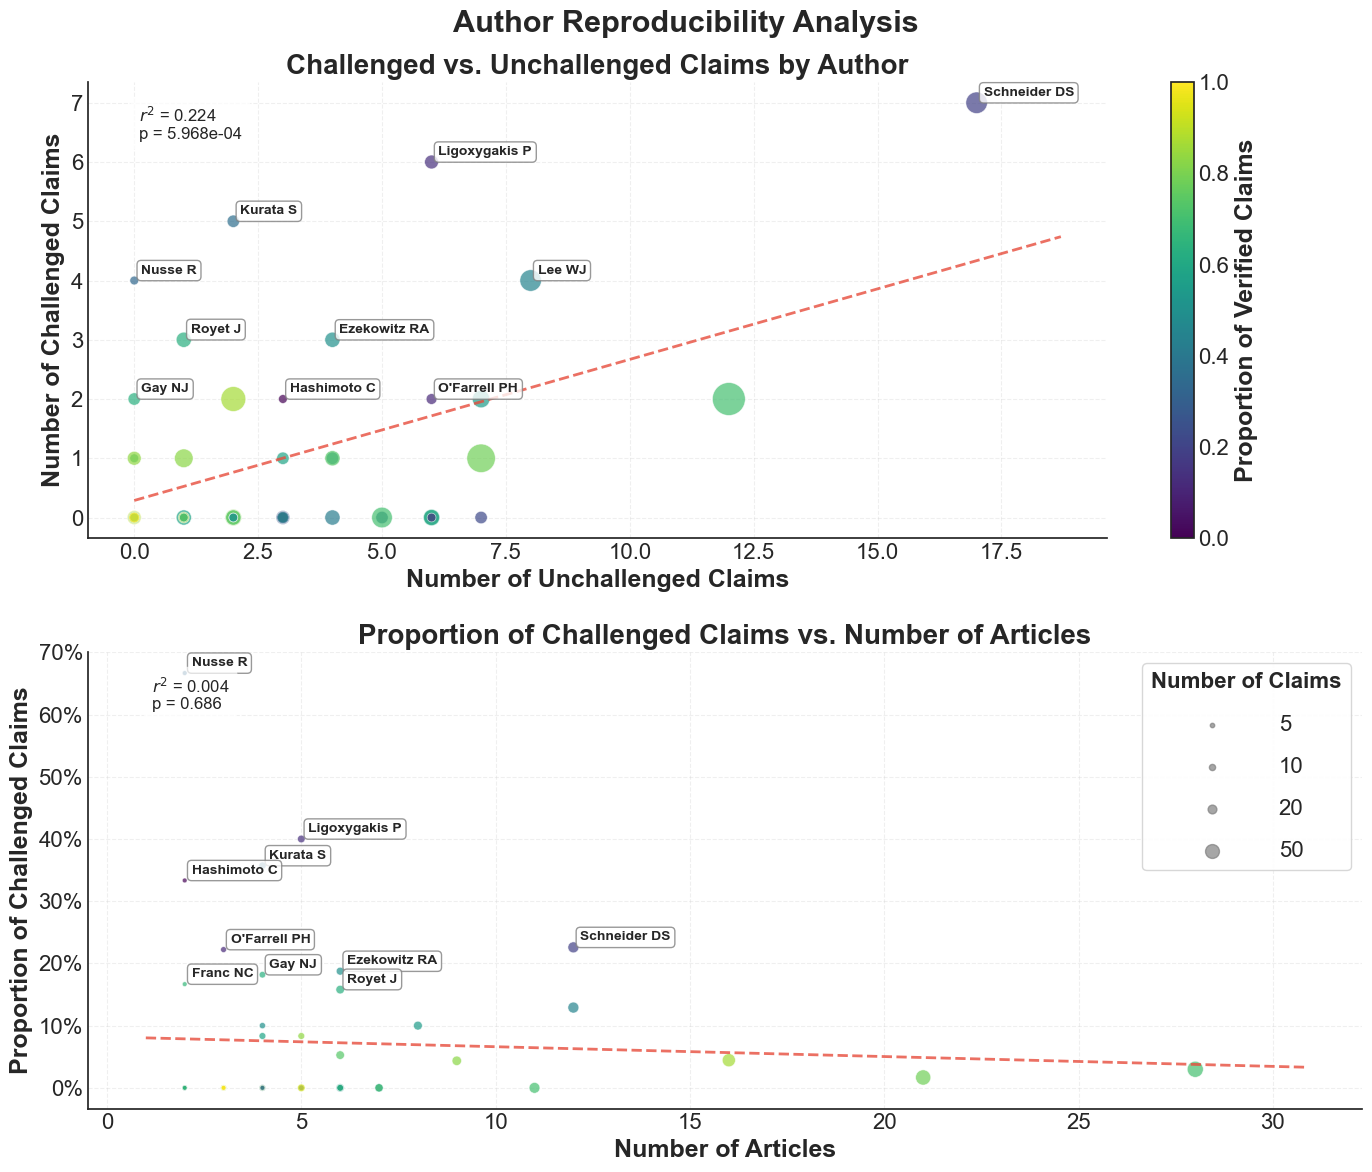

In [22]:

# Example usage for general scatter plot:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='Unchallenged', 
    y_var='Challenged',
    size_var='Articles', 
    title='Challenged vs. Unchallenged Claims by Author',
    x_label='Number of Unchallenged Claims',
    y_label='Number of Challenged Claims',
    annotate_top_n=5
)
plt.savefig(f'{aut_pos}_author_publication.png', dpi=300, bbox_inches='tight')
# Example usage for specialized author reproducibility plot:
fig = plot_info.create_author_reproducibility_scatter(
    to_plot, 
    min_articles=1, 
    min_claims=1,
    annotate_top_n=10
)

# Save examples:
plt.savefig(f'{aut_pos}_author_reproducibility.png', dpi=300, bbox_inches='tight')
#plt.savefig('author_reproducibility.pdf', bbox_inches='tight')

In [23]:
# Create a multivariable regression model to predict reproducibility
# First, ensure no object datatypes are in our dataset by examining the data
print("Data types before preprocessing:")

# Convert any object columns to appropriate types
# Make sure all numeric columns are properly formatted
numeric_cols = ['Articles', 'Unchallenged_prop', 'Challenged_prop', 'Challenged_prop']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert boolean columns to integer
bool_cols = ['Historical lab', 'Continuity']
for col in bool_cols:
    df[col] = df[col].astype(int)
    
# Make sure categorical variables are properly typed
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].astype('category')
    
# Create dummy variables properly
df_model = pd.get_dummies(df[['Historical lab', 'Continuity', 'Ivy league', 
                             'Articles', 'Unchallenged_prop', 'Challenged_prop', 
                             'Challenged_prop']])

# Print data types after preprocessing
print("Data types after preprocessing:")
print(df_model.dtypes)

# Fit regression model for unchallenged proportion
# Select predictors (X) and target (y)
y = df_model['Unchallenged_prop']
X = df_model.drop(['Unchallenged_prop', 'Challenged_prop', 'Challenged_prop'], axis=1)

# Add constant
X = sm.add_constant(X)

# Verify no object datatypes remain
print("X dtypes:", X.dtypes.unique())
print("y dtype:", y.dtype)

# Fit model
try:
    model_unchallenged = sm.OLS(y, X).fit()
    print("Model successfully fit!")
    
    # Create another model for reproducibility score
    y2 = df_model['Challenged_prop']
    model_repro = sm.OLS(y2, X).fit()
    
    # Print summaries
    print("\nRegression Model for Unchallenged Proportion:")
    print(model_unchallenged.summary())
    
    print("\nRegression Model for Reproducibility Score:")
    print(model_repro.summary())
    
    # Create a visual summary of the regression results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Extract coefficients and confidence intervals for unchallenged model
    coefs1 = model_unchallenged.params[1:]
    conf_intervals1 = model_unchallenged.conf_int().iloc[1:]
    errors1 = (conf_intervals1[1] - conf_intervals1[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for unchallenged model
    ax1.errorbar(coefs1, range(len(coefs1)), xerr=errors1, fmt='o', capsize=5, color='#3498db')
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_yticks(range(len(coefs1)))
    ax1.set_yticklabels(coefs1.index)
    ax1.set_xlabel('Coefficient Value')
    ax1.set_title('Predictors of Unchallenged Claims')
    
    # Extract coefficients and confidence intervals for reproducibility model
    coefs2 = model_repro.params[1:]
    conf_intervals2 = model_repro.conf_int().iloc[1:]
    errors2 = (conf_intervals2[1] - conf_intervals2[0]) / 3.92  # 95% CI to standard error
    
    # Plot coefficients for reproducibility model
    ax2.errorbar(coefs2, range(len(coefs2)), xerr=errors2, fmt='o', capsize=5, color='#2ecc71')
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_yticks(range(len(coefs2)))
    ax2.set_yticklabels(coefs2.index)
    ax2.set_xlabel('Coefficient Value')
    ax2.set_title('Predictors of Reproducibility Score')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error fitting model: {e}")
    print("Let's try an alternative approach using a simpler model")
    
    # Create a simpler model with fewer variables
    basic_vars = ['Articles', 'Historical lab', 'Continuity']
    df_simple = df[basic_vars + ['Unchallenged_prop']].copy()
    
    for col in basic_vars + ['Unchallenged_prop']:
        df_simple[col] = pd.to_numeric(df_simple[col], errors='coerce')
    
    # Drop missing values
    df_simple = df_simple.dropna()
    
    # Run simpler regression
    X_simple = sm.add_constant(df_simple[basic_vars])
    y_simple = df_simple['Unchallenged_prop']
    
    model_simple = sm.OLS(y_simple, X_simple).fit()
    print("\nSimplified Regression Model:")
    print(model_simple.summary())


Data types before preprocessing:
Data types after preprocessing:
Historical lab         int64
Continuity             int64
Ivy league              bool
Articles               int64
Unchallenged_prop    float64
Challenged_prop      float64
Challenged_prop      float64
dtype: object
X dtypes: [dtype('float64') dtype('int64') dtype('bool')]
y dtype: float64
Error fitting model: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Let's try an alternative approach using a simpler model

Simplified Regression Model:
                            OLS Regression Results                            
Dep. Variable:      Unchallenged_prop   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     4.191
Date:                Mon, 07 Apr 2025   Prob (F-statistic):             0.0107
Time:                        14:55:05   Log-Likelihood:   

/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_6996/470246304.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_6996/470246304.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)
/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_6996/470246304.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us